In [2]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def analyze_results(file_path):
    # ファイルを読み込み
    df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1)
    df.columns = ["FrameID", "PredictedLabel", "TrueLabel"]
    
    # 予測と真のラベルを取得
    y_pred = df["PredictedLabel"]
    y_true = df["TrueLabel"]
    
    # accuracyを計算
    accuracy = accuracy_score(y_true, y_pred)
    
    # precision, recall, f1を計算 (average=Noneにしてクラスごとのスコアを取得)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    
    # 結果をDataFrameにまとめる
    result_df = pd.DataFrame({
        "Class": sorted(df["TrueLabel"].unique()),
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    return accuracy, result_df


In [3]:
file_path = './r3d/logs/exp01/result6000.txt'
accuracy, result_df = analyze_results(file_path)

print('R3D without sensor fusion')
print("Overall Accuracy:", accuracy)
print("Class-wise Metrics:")
print(result_df)


R3D without sensor fusion
Overall Accuracy: 0.7139059742717577
Class-wise Metrics:
    Class  Precision    Recall  F1 Score
0       0   0.361876  0.444510  0.398959
1       1   0.425842  0.570212  0.487564
2       2   0.900413  0.463710  0.612159
3       3   0.954604  0.740179  0.833827
4       4   0.915721  0.290402  0.440961
5       5   0.831270  0.413768  0.552518
6       6   0.444104  0.485045  0.463673
7       7   0.318742  0.689975  0.436047
8       8   0.639656  0.553687  0.593575
9       9   0.745376  0.232564  0.354516
10     10   0.646876  0.915911  0.758236
11     11   0.980707  0.964185  0.972376


In [4]:
file_path = './r3d2st/logs/exp03/result4000.txt'
accuracy, result_df = analyze_results(file_path)

print("R3D with sensor fusion")
print("Overall Accuracy:", accuracy)
print("Class-wise Metrics:")
print(result_df)


R3D with sensor fusion
Overall Accuracy: 0.7356909652753035
Class-wise Metrics:
    Class  Precision    Recall  F1 Score
0       0   0.491762  0.281550  0.358085
1       1   0.386437  0.753686  0.510914
2       2   0.893438  0.608302  0.723801
3       3   0.915529  0.815176  0.862443
4       4   0.882447  0.491322  0.631206
5       5   0.637512  0.304270  0.411933
6       6   0.477205  0.371161  0.417555
7       7   0.361438  0.683166  0.472758
8       8   0.446786  0.749677  0.559893
9       9   0.307692  0.000527  0.001053
10     10   0.822386  0.665940  0.735941
11     11   0.978696  0.972564  0.975620


In [5]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def agg_result(file_path):
    """ 同じフレームの予測結果を最頻値で集約し、結果を返す
    """
    # ファイルを読み込み
    df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1)
    df.columns = ["FrameID", "PredictedLabel", "TrueLabel"]
    
    # 予測と真のラベルを取得
    y_pred = list(df["PredictedLabel"])
    y_true = list(df["TrueLabel"])
    
    y_pred_agg = {}
    y_true_agg = {}
    roop_num = 0
    for i, (p, t) in enumerate(zip(y_pred, y_true)):
        if i != 0 and i % 32 == 0:
            roop_num += 1
        index = i % 32 + roop_num
        try:
            y_pred_agg[index] += [p]
            y_true_agg[index] += [t]
        except KeyError:
            y_pred_agg[index] = [p]
            y_true_agg[index] = [t]
    
    for key in y_pred_agg.keys():
        # 最頻値
        y_pred_agg[key] = max(set(y_pred_agg[key]), key=y_pred_agg[key].count)
        y_true_agg[key] = y_true_agg[key][0]
    # to list
    y_pred_agg = [y_pred_agg[key] for key in sorted(y_pred_agg.keys())]
    y_true_agg = [y_true_agg[key] for key in sorted(y_true_agg.keys())]
    return y_pred_agg, y_true_agg

def analyze_results(y_pred, y_true):
    # accuracyを計算
    accuracy = accuracy_score(y_true, y_pred)
    
    # precision, recall, f1を計算 (average=Noneにしてクラスごとのスコアを取得)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    
    # 結果をDataFrameにまとめる
    result_df = pd.DataFrame({
        "Class": sorted(set(y_true)),
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    return accuracy, result_df


In [6]:
cnn_lstm = """    1  & \bf{946}&   67 &  161 &   38 &    4 &   23 &   77 &  162 &   41 &   49 &  118 &   40     \\ \hline
    2  &   232 &\bf{1227}&  253 &   31 &    6 &   27 &    9 &   37 &    4 &    7 &   38 &    8     \\ \hline
    3  &   160 &   12 &\bf{3080}&   30 &    1 &    2 &  443 &   31 &  131 &   47 &    7 &    6     \\ \hline
    4  &   117 &   11 &   13 &\bf{2199}&    2 &    2 &    9 &    0 &   56 &    0 &   66 &   68     \\ \hline
    5  &   144 &   24 &   77 &    5 &\bf{683}&   61 &  240 &   44 &    0 &    0 &  149 &    0     \\ \hline
    6  &    31 &   15 &   48 &    8 &   61 &\bf{793}&  124 &  352 &    4 &    0 &   39 &   11     \\ \hline
    7  &    18 &    0 &   10 &   12 &   12 &    3 &\bf{668}&  197 &    0 &    0 &    8 &    0     \\ \hline
    8  &   429 &  246 &   28 &    7 &   19 &  427 &  220 &\bf{1193}&   14 &    0 &   94 &   18     \\ \hline
    9  &    29 &    0 &    0 &    1 &    0 &    0 &  268 &   16 &\bf{370}&    0 &  109 &    1     \\ \hline
    10 &    76 &    9 &   42 &    5 &    0 &    0 &    0 &    0 &    0 &\bf{84}&    0 &   12     \\ \hline
    11 &   369 &    5 &    2 &  110 &    7 &    9 &   27 &   48 &  231 &    0 &\bf{1754}&   27     \\ \hline
    12 &   122 &   15 &  174 &   39 &    0 &    1 &    3 &   64 &    1 &    1 &   19 &\bf{6052}    \\ \hline"""

cnn_lstm_sensor = """     1 & \bf{361}&  132 &  323 &  213 &   95 &   68 &   75 &   28 &   53 &  161 &  175 &   42     \\ \hline
     2 &    67 &\bf{1424}&  137 &    9 &   16 &    8 &    5 &  151 &    0 &    6 &   52 &    4     \\ \hline
     3 &   287 &   94 &\bf{2983}&   25 &   39 &    1 &  283 &    1 &   47 &  154 &   35 &    1     \\ \hline
     4 &    17 &    5 &   20 &\bf{2328}&    1 &    0 &   28 &    1 &   38 &    1 &   32 &   72     \\ \hline
     5 &     0 &    3 &   20 &    0 &\bf{1081}&   64 &  190 &    6 &   11 &    0 &   52 &    0     \\ \hline
     6 &    30 &    2 &    0 &   22 &  140 &\bf{1013}&  117 &  118 &    5 &    1 &   38 &    0     \\ \hline
     7 &     1 &    4 &    3 &   23 &   12 &   53 &\bf{731}&   84 &    1 &    0 &    1 &   15     \\ \hline
     8 &    69 &  288 &   15 &    3 &   52 &  323 &  329 &\bf{1213}&   31 &    1 &  171 &  200     \\ \hline
     9 &     0 &    0 &   34 &    5 &   42 &   26 &  264 &    0 &\bf{263}&    0 &  160 &    0     \\ \hline
    10 &    18 &   19 &   59 &   13 &    0 &    0 &    0 &    0 &    0 &\bf{118}&    0 &    1     \\ \hline
    11 &    12 &    4 &    0 &  129 &  158 &   93 &   47 &   20 &  267 &    3 &\bf{1856}&    0     \\ \hline
    12 &    21 &    3 &    6 &  138 &    0 &    3 &    3 &    5 &    1 &    2 &   12 &\bf{6297}    \\ \hline"""

# 1行ずつ処理
def parse_to_cm(text):
    number = 0
    confusion_matrix = []
    for i, line in enumerate(text.split('\n')):
        line = line.replace('\bf{', '')
        line = line.replace('}', '')
        line = line.replace('\\ \hline', '')
        # カンマで分割
        line = line.split('&')
        # 空白を削除
        line = [float(l.strip()) for l in line]
        line = line[1:]
        confusion_matrix.append(line)
        number += sum(line)
    return number, confusion_matrix

def cm_to_tex(cm):
    cm_str = ''
    for i, row in enumerate(cm):
        cm_str += str(i+1) + ' & '
        # 対角成分を太字にする
        for j, r in enumerate(row):
            if i == j:
                cm_str += '\\bf{' + f'{r:.2f}' + '}'
            else:
                cm_str += f'{r:.2f}'
            if j != len(row) - 1:
                cm_str += ' & '
        cm_str += ' \\\\ \hline\n'
    return cm_str

number, cm = parse_to_cm(cnn_lstm_sensor)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        cm[i][j] = 100*cm[i][j] / number

cm = cm_to_tex(cm)
print(cm)

print(number)



1 & \bf{1.35} & 0.49 & 1.21 & 0.80 & 0.36 & 0.25 & 0.28 & 0.10 & 0.20 & 0.60 & 0.65 & 0.16 \\ \hline
2 & 0.25 & \bf{5.33} & 0.51 & 0.03 & 0.06 & 0.03 & 0.02 & 0.56 & 0.00 & 0.02 & 0.19 & 0.01 \\ \hline
3 & 1.07 & 0.35 & \bf{11.16} & 0.09 & 0.15 & 0.00 & 1.06 & 0.00 & 0.18 & 0.58 & 0.13 & 0.00 \\ \hline
4 & 0.06 & 0.02 & 0.07 & \bf{8.71} & 0.00 & 0.00 & 0.10 & 0.00 & 0.14 & 0.00 & 0.12 & 0.27 \\ \hline
5 & 0.00 & 0.01 & 0.07 & 0.00 & \bf{4.04} & 0.24 & 0.71 & 0.02 & 0.04 & 0.00 & 0.19 & 0.00 \\ \hline
6 & 0.11 & 0.01 & 0.00 & 0.08 & 0.52 & \bf{3.79} & 0.44 & 0.44 & 0.02 & 0.00 & 0.14 & 0.00 \\ \hline
7 & 0.00 & 0.01 & 0.01 & 0.09 & 0.04 & 0.20 & \bf{2.73} & 0.31 & 0.00 & 0.00 & 0.00 & 0.06 \\ \hline
8 & 0.26 & 1.08 & 0.06 & 0.01 & 0.19 & 1.21 & 1.23 & \bf{4.54} & 0.12 & 0.00 & 0.64 & 0.75 \\ \hline
9 & 0.00 & 0.00 & 0.13 & 0.02 & 0.16 & 0.10 & 0.99 & 0.00 & \bf{0.98} & 0.00 & 0.60 & 0.00 \\ \hline
10 & 0.07 & 0.07 & 0.22 & 0.05 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & \bf{0.44} & 0.00 & 0.0

In [7]:
from glob import glob
import json
metadata_path = sorted(glob('./data/test/*'))

metadata = []
for p in metadata_path:
    with open(p, 'r') as f:
        md = json.load(f)
    metadata += md['frames']

frames = []
for i, md in enumerate(metadata):
    t = md['time']
    if 'Ink' in md['label_name']:
        print(md)
    t = t.split(':')
    t = int(t[0])*10000 + int(t[1])*100 + int(t[2])
    if t > 73000 and t < 170000:
        frames.append(i)

print(len(frames)/15)
start = frames[0]
end = frames[-1]
print(start, end)


{'number': 2687, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2688, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2689, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2690, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2691, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2692, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2693, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2694, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2695, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2696, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number': 2697, 'label': '5', 'label_name': 'Ink roller adjustment', 'time': '08:00:34'}
{'number':

In [8]:
file_path = './r3d/logs/exp01/result6000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
print(len(y_pred_agg))
y_pred_agg, y_true_agg = y_pred_agg[start//7:end//7], y_true_agg[start//7:end//7]
y_pred_agg_r3d, y_true_agg_r3d = [], []
for p, t in zip(y_pred_agg, y_true_agg):
    y_pred_agg_r3d += [p]*7
    y_true_agg_r3d += [t]*7
y_pred_agg_r3d, y_true_agg_r3d = y_pred_agg_r3d[::15], y_true_agg_r3d[::15]

print(len(y_pred_agg))
accuracy_r3d, result_df_r3d = analyze_results(y_pred_agg_r3d, y_true_agg_r3d)
print('R3D without sensor fusion')
print("Overall Accuracy:", accuracy_r3d)
print("Class-wise Metrics:")
print(result_df_r3d)
# 混同行列
number = len(y_pred_agg)
cm = [[0 for _ in range(12)] for _ in range(12)]
for p, t in zip(y_pred_agg, y_true_agg):
    cm[t][p] += 1
for i in range(len(cm)):
    for j in range(len(cm[i])):
        cm[i][j] = 100*cm[i][j] / number
print(cm_to_tex(cm))


file_path = './r3d2st/logs/exp03/result4000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
print(len(y_pred_agg))
y_pred_agg, y_true_agg = y_pred_agg[start//15:end//15], y_true_agg[start//15:end//15]
print(len(y_pred_agg))
accuracy_r3d_sensor, result_df_r3d_sensor = analyze_results(y_pred_agg, y_true_agg)
print("R3D with sensor fusion")
print("Overall Accuracy:", accuracy_r3d_sensor)
print("Class-wise Metrics:")
print(result_df_r3d_sensor)
number = len(y_pred_agg)
cm = [[0 for _ in range(12)] for _ in range(12)]
for p, t in zip(y_pred_agg, y_true_agg):
    cm[t][p] += 1
for i in range(len(cm)):
    for j in range(len(cm[i])):
        cm[i][j] = 100*cm[i][j] / number
print(cm_to_tex(cm))

78233
65199
R3D without sensor fusion
Overall Accuracy: 0.6753541262694318
Class-wise Metrics:
    Class  Precision    Recall  F1 Score
0       0   0.386393  0.472030  0.424940
1       1   0.463684  0.578947  0.514944
2       2   0.909767  0.471867  0.621422
3       3   0.956838  0.766809  0.851348
4       4   0.923977  0.288497  0.439703
5       5   0.847552  0.410014  0.552668
6       6   0.450861  0.482646  0.466213
7       7   0.330429  0.704769  0.449916
8       8   0.657817  0.581486  0.617301
9       9   0.830986  0.248945  0.383117
10     10   0.665152  0.944355  0.780537
11     11   0.963142  0.968072  0.965601
1 & \bf{2.89} & 0.77 & 0.22 & 0.10 & 0.00 & 0.03 & 0.06 & 1.62 & 0.07 & 0.02 & 0.34 & 0.04 \\ \hline
2 & 0.19 & \bf{4.68} & 0.09 & 0.00 & 0.00 & 0.02 & 0.00 & 3.03 & 0.00 & 0.00 & 0.10 & 0.00 \\ \hline
3 & 2.24 & 3.11 & \bf{8.83} & 0.03 & 0.06 & 0.01 & 0.50 & 3.02 & 0.47 & 0.01 & 0.45 & 0.02 \\ \hline
4 & 0.41 & 0.16 & 0.07 & \bf{6.48} & 0.00 & 0.00 & 0.17 & 0.40 & 0.04

/home/kataoka/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# CNN-LSTMとCNN-LSMT with sensor fusionの結果の検定
import numpy as np
import statistics

file_path = 'aopa1st/result_test.csv'
time_list = [date.split(' ')[1].replace('H', ':').replace('M', ':').replace('S', '') for date in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['date'])]
aopa1_preds_ = [pred for pred in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['pred'])]
aopa1_anss = [ans for ans in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['ans'])]

class_label = ['Chores', 'Paperwork', 'Cylinder preparation', 'Material preparation', 'Ink roller adjustment', 'Winding preparation (top)', 'Winding preparation (bottom)', 'Creation of sample', 'Ink adjustment', 'Workbench', 'Product check', 'Nonhuman work']


file_path = 'cnn_lstm/outputs/feat-sensor-small/feat-sensor-small/lr001b16wD/ep330/test.csv'
data = np.array(pd.read_csv(file_path))

outputs = {}
for d in data:
    time = d[0]
    pred = d[1]
    label = d[2]+1
    try:
        outputs[time]['pred'] += [pred]
        outputs[time]['label'] += [label]
    except:
        outputs[time] = {'pred': [pred], 'label': [label]}
moded = []
#for key, item in sorted(outputs.items()):
for key in time_list:
    try:
        pred = outputs[key]['pred'] #item['pred']
        label = outputs[key]['label'] #item['label']
        pred = statistics.mode(pred)
        label = statistics.mode(label)
        moded += [[key, pred, label]]
    except:
        # print(f'"{key}",')
        pass
moded = np.array(moded)
sensor_preds = moded[:, 1].astype(int)
sensor_anss = moded[:, 2].astype(int) - 1

aopa1_preds = []
for i, t in enumerate(time_list):
    if t in moded[:, 0]:
        aopa1_preds += [aopa1_preds_[i]]

aopa1_preds = np.array(aopa1_preds).astype(int)


from statsmodels.stats.contingency_tables import mcnemar

# 予測結果の一致/不一致を確認する
contingency_table = [[0, 0], [0, 0]]
for pred1, pred2, true in zip(aopa1_preds, sensor_preds, sensor_anss):
    if pred1 == true and pred2 == true:
        contingency_table[0][0] += 1  # 両方正解
    elif pred1 == true and pred2 != true:
        contingency_table[0][1] += 1  # モデル1のみ正解
    elif pred1 != true and pred2 == true:
        contingency_table[1][0] += 1  # モデル2のみ正解
    else:
        contingency_table[1][1] += 1  # 両方不正解

print("Contingency Table:", contingency_table)

# McNemar検定を実行
result = mcnemar(contingency_table, exact=True)  # exact=Trueで正確なp値を計算
print("McNemar Test Statistic:", result.statistic)
print("p-value:", result.pvalue)

# 結果の解釈
alpha = 0.05  # 有意水準
if result.pvalue < alpha:
    print("有意な差があります")
else:
    print("有意な差はありません")



Contingency Table: [[9842, 5760], [2561, 3772]]
McNemar Test Statistic: 2561.0
p-value: 2.9667218180645597e-276
有意な差があります


In [ ]:
# GLMM

import os
import numpy as np
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Rパッケージのインポート
glmmTMB = importr('glmmTMB')
base = importr('base')
stats = importr('stats')



lme4_lib_path = "/home/kataoka/R/x86_64-pc-linux-gnu-library/4.4/lme4"

# ライブラリパスを追加
robjects.r('.libPaths(c(.libPaths(), "{}"))'.format(lme4_lib_path))

os.environ['R_HOME'] = '/usr/bin/R'

# Rのユーザーライブラリパス（Rコンソールで.libPaths()で確認可能）
os.environ['R_LIBS_USER'] = '/home/kataoka/R/x86_64-pc-linux-gnu-library/4.4'


file_path = 'aopa1st/result_test.csv'
time_list = [date.split(' ')[1].replace('H', ':').replace('M', ':').replace('S', '') for date in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['date'])]
aopa1_preds_ = [pred for pred in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['pred'])]
aopa1_anss = [ans for ans in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['ans'])]

class_label = ['Chores', 'Paperwork', 'Cylinder preparation', 'Material preparation', 'Ink roller adjustment', 'Winding preparation (top)', 'Winding preparation (bottom)', 'Creation of sample', 'Ink adjustment', 'Workbench', 'Product check', 'Nonhuman work']


file_path = 'cnn_lstm/outputs/feat-sensor-small/feat-sensor-small/lr001b16wD/ep330/test.csv'
data = np.array(pd.read_csv(file_path))

outputs = {}
for d in data:
    time = d[0]
    pred = d[1]
    label = d[2]+1
    try:
        outputs[time]['pred'] += [pred]
        outputs[time]['label'] += [label]
    except:
        outputs[time] = {'pred': [pred], 'label': [label]}
moded = []
#for key, item in sorted(outputs.items()):
for key in time_list:
    try:
        pred = outputs[key]['pred'] #item['pred']
        label = outputs[key]['label'] #item['label']
        pred = statistics.mode(pred)
        label = statistics.mode(label)
        moded += [[key, pred, label]]
    except:
        # print(f'"{key}",')
        pass
moded = np.array(moded)
sensor_preds = moded[:, 1].astype(int)
sensor_anss = moded[:, 2].astype(int) - 1

aopa1_preds = []
for i, t in enumerate(time_list):
    if t in moded[:, 0]:
        aopa1_preds += [aopa1_preds_[i]]

aopa1_preds = np.array(aopa1_preds).astype(int)


# 仮想データの作成
# フレーム番号（時間軸）
frames = np.arange(len(aopa1_preds))

# 真のクラスラベル（0〜11の12クラス）
np.random.seed(0)
true_labels = sensor_anss

# モデル1とモデル2の予測結果（例として）
pred_model1 = aopa1_preds
pred_model2 = sensor_preds

# データフレームの作成
data = pd.DataFrame({
    'Frame': frames,
    'TrueLabel': true_labels,
    'PredModel1': pred_model1,
    'PredModel2': pred_model2
})

# 長い形式への変換
data_long = pd.melt(data, id_vars=['Frame', 'TrueLabel'], value_vars=['PredModel1', 'PredModel2'],
                    var_name='Model', value_name='PredictedLabel')

# モデル名をカテゴリカルに変換
data_long['Model'] = data_long['Model'].astype('category')

# 正解/不正解のフラグ
data_long['Correct'] = (data_long['TrueLabel'] == data_long['PredictedLabel']).astype(int)

# 目的変数：Correct（正解=1、不正解=0）
# 固定効果：Model
# ランダム効果：Frame（フレーム間の依存性を考慮）

formula = 'Correct ~ Model + (1|Frame)'

# モデルのフィッティング
model = Lmer(formula, data=data_long, family='binomial')
result = model.fit()
print(result)


unable to evaluate scaled gradient 

Problem with Hessian check (infinite or missing values?) 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Correct~Model+(1|Frame)

Family: binomial	 Inference: parametric

Number of observations: 43870	 Groups: {'Frame': 21935.0}

Log-likelihood: -27914.227 	 AIC: 55834.454

Random effects:

              Name    Var    Std
Frame  (Intercept)  0.785  0.886

No random effect correlations specified

Fixed effects:

                 Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
(Intercept)         1.067   1.034    1.099  0.017  2.906      2.812   
ModelPredModel2    -0.753  -0.794   -0.712  0.021  0.471      0.452   

                 OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val  \
(Intercept)           3.003  0.744        0.738         0.750  63.952    0.0   
ModelPredModel2       0.490  0.320        0.311         0.329 -36.050    0.0   

                 Sig  
(Intercept)      ***  
ModelPredModel2  ***  


In [19]:
import numpy as np
import pandas as pd
import statistics
from scipy.stats import chi2

import numpy as np
import statistics

file_path = 'aopa1st/result_test.csv'
time_list = [date.split(' ')[1].replace('H', ':').replace('M', ':').replace('S', '') for date in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['date'])]
aopa1_preds_ = [pred for pred in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['pred'])]
aopa1_anss = [ans for ans in np.array(pd.read_csv(file_path, header=None, names=['date', 'pred', 'ans'])['ans'])]

class_label = ['Chores', 'Paperwork', 'Cylinder preparation', 'Material preparation', 'Ink roller adjustment', 'Winding preparation (top)', 'Winding preparation (bottom)', 'Creation of sample', 'Ink adjustment', 'Workbench', 'Product check', 'Nonhuman work']


file_path = 'cnn_lstm/outputs/feat-sensor-small/feat-sensor-small/lr001b16wD/ep330/test.csv'
data = np.array(pd.read_csv(file_path))

outputs = {}
for d in data:
    time = d[0]
    pred = d[1]
    label = d[2]+1
    try:
        outputs[time]['pred'] += [pred]
        outputs[time]['label'] += [label]
    except:
        outputs[time] = {'pred': [pred], 'label': [label]}
moded = []
#for key, item in sorted(outputs.items()):
for key in time_list:
    try:
        pred = outputs[key]['pred'] #item['pred']
        label = outputs[key]['label'] #item['label']
        pred = statistics.mode(pred)
        label = statistics.mode(label)
        moded += [[key, pred, label]]
    except:
        # print(f'"{key}",')
        pass
moded = np.array(moded)
sensor_preds = moded[:, 1].astype(int)
sensor_anss = moded[:, 2].astype(int) - 1

aopa1_preds = []
for i, t in enumerate(time_list):
    if t in moded[:, 0]:
        aopa1_preds += [aopa1_preds_[i]]

aopa1_preds = np.array(aopa1_preds).astype(int)

# クラス数の定義
n_classes = len(class_label)

# **Bowkerの対称性検定の実装**

# 1. 混同行列（対称な分割表）の作成
contingency_table = np.zeros((n_classes, n_classes), dtype=int)

for pred1, pred2 in zip(aopa1_preds, sensor_preds):
    contingency_table[pred1][pred2] += 1

print("Contingency Table:")
print(contingency_table)

# 2. 検定統計量の計算
test_statistic = 0
for i in range(n_classes):
    for j in range(i+1, n_classes):
        observed_ij = contingency_table[i][j]
        observed_ji = contingency_table[j][i]
        numerator = (observed_ij - observed_ji) ** 2
        denominator = observed_ij + observed_ji
        if denominator != 0:
            test_statistic += numerator / denominator

print("Test Statistic:", test_statistic)

# 3. p値の計算
degrees_of_freedom = (n_classes * (n_classes - 1)) / 2
p_value = chi2.sf(test_statistic, degrees_of_freedom)

print("Degrees of Freedom:", degrees_of_freedom)

print("p-value:", p_value)
# 結果の解釈
alpha = 0.05  # 有意水準
if p_value < alpha:
    print("有意な差があります")
else:
    print("有意な差はありません")


Contingency Table:
[[ 745  117    8  105   40   23    2  504    9  116  169  247]
 [  71  908    1    1   16    7    1  331    0    0    1   31]
 [1129  472  422   11   85  204    6  117    0   13    7  744]
 [ 335   21    7 1196    9    4    4   59    1    0   57  289]
 [  18    9    0    2  429    1   10  217    0    0   11   37]
 [  62   38    1    0   14  240   21  736    0    0   13    1]
 [ 443   25   44   11  108  169  268  339    9    4  128  252]
 [ 218  225    0    1    2   54  185  924    2    0   46  178]
 [  76    4   85   46   18   49    7   66   12    0  251    1]
 [  19    9    0    0    0    0    0    0    0   76    0   15]
 [ 112   14    5  106   56   60   14  602    2    0  973   14]
 [  81    5   16   42    0    0    0   63    1    2   30 4863]]
Test Statistic: 6584.946450420513
Degrees of Freedom: 66.0
p-value: 0.0
有意な差があります


In [13]:
import torchvision
video_model = torchvision.models.video.r3d_18()
in_features = video_model.fc.in_features
in_features



/home/kataoka/.pyenv/versions/3.10.8/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


512

In [14]:
sampling_fps = 29.97002997002997
dt = 1 / sampling_fps

min_scale = 2
max_scale = 4 * sampling_fps
ds = sampling_fps / 30

f_center = 0.8125
def calc_s(f):
    return f_center / (f * (1/sampling_fps))

min_scale = calc_s(sampling_fps / 2)
max_scale = calc_s(0.2)
# max_scale = calc_s(0.3)

scales = np.arange(min_scale, max_scale+ds, ds)
scales = np.geomspace(min_scale, max_scale, num=len(scales))

from pywt import scale2frequency
sampling_period = 1 / sampling_fps
print(scale2frequency('morl', scales)/sampling_period)
# f = scale2frequency(wavelet, scale) / sampling_period

print(scales)



# for s, f in zip(scales, scale2frequency('morl', scales)/sampling_period):
#     print(s*f*(1/sampling_fps))

# print(0.9549 * sampling_fps / scales[0])
# print(0.9549 * sampling_fps / scales[-1])
# print(len(scales))


[14.98501499 14.45987021 13.95312896 13.46414629 12.99229984 12.5369891
 12.09763457 11.67367706 11.26457701 10.86981372 10.48888479 10.12130537
  9.76660766  9.4243402   9.09406739  8.77536888  8.46783906  8.17108651
  7.88473355  7.60841573  7.34178138  7.08449114  6.83621755  6.59664463
  6.36546745  6.1423918   5.92713376  5.71941937  5.51898426  5.32557332
  5.13894041  4.95884799  4.78506684  4.61737579  4.45556142  4.29941778
  4.14874614  4.00335474  3.86305853  3.72767895  3.59704371  3.47098653
  3.34934699  3.23197026  3.11870695  3.00941292  2.90394907  2.80218116
  2.70397967  2.60921962  2.5177804   2.42954564  2.34440304  2.26224423
  2.18296464  2.10646339  2.03264309  1.9614098   1.89267286  1.82634478
  1.76234115  1.7005805   1.64098423  1.5834765   1.5279841   1.47443642
  1.42276529  1.37290496  1.32479197  1.27836509  1.23356522  1.19033534
  1.14862044  1.10836743  1.06952507  1.03204393  0.9958763   0.96097615
  0.92729907  0.89480218  0.86344414  0.83318504  0.

In [15]:
# McNemar検定

file_path = './r3d/logs/exp01/result6000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
y_pred_agg, y_true_agg = y_pred_agg[start//7:end//7], y_true_agg[start//7:end//7]
y_pred_agg_r3d, y_true_agg_r3d = [], []
for p, t in zip(y_pred_agg, y_true_agg):
    y_pred_agg_r3d += [p]*7
    y_true_agg_r3d += [t]*7
y_pred_agg_r3d, y_true_agg_r3d = y_pred_agg_r3d[::15], y_true_agg_r3d[::15]


file_path = './r3d2st/logs/exp03/result4000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
y_pred_agg_r3d2, y_true_agg_r3d2 = y_pred_agg[start//15:end//15], y_true_agg[start//15:end//15]

print(len(y_pred_agg_r3d), len(y_pred_agg_r3d2))

from statsmodels.stats.contingency_tables import mcnemar

# 予測結果の一致/不一致を確認する
contingency_table = [[0, 0], [0, 0]]
for pred1, pred2, true in zip(y_pred_agg_r3d, y_pred_agg_r3d2, y_true_agg_r3d2):
    if pred1 == true and pred2 == true:
        contingency_table[0][0] += 1  # 両方正解
    elif pred1 == true and pred2 != true:
        contingency_table[0][1] += 1  # モデル1のみ正解
    elif pred1 != true and pred2 == true:
        contingency_table[1][0] += 1  # モデル2のみ正解
    else:
        contingency_table[1][1] += 1  # 両方不正解

print("Contingency Table:", contingency_table)

# McNemar検定を実行
result = mcnemar(contingency_table, exact=True)  # exact=Trueで正確なp値を計算
print("McNemar Test Statistic:", result.statistic)
print("p-value:", result.pvalue)

# 結果の解釈
alpha = 0.05  # 有意水準
if result.pvalue < alpha:
    print("有意な差があります")
else:
    print("有意な差はありません")


30427 30427
Contingency Table: [[16887, 2542], [4448, 6550]]
McNemar Test Statistic: 2542.0
p-value: 2.3310073266981966e-116
有意な差があります


In [ ]:
from scipy.stats import chi2

file_path = './r3d/logs/exp01/result6000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
y_pred_agg, y_true_agg = y_pred_agg[start//7:end//7], y_true_agg[start//7:end//7]
y_pred_agg_r3d, y_true_agg_r3d = [], []
for p, t in zip(y_pred_agg, y_true_agg):
    y_pred_agg_r3d += [p]*7
    y_true_agg_r3d += [t]*7
y_pred_agg_r3d, y_true_agg_r3d = y_pred_agg_r3d[::15], y_true_agg_r3d[::15]


file_path = './r3d2st/logs/exp03/result4000.txt'
y_pred_agg, y_true_agg = agg_result(file_path)
y_pred_agg_r3d2, y_true_agg_r3d2 = y_pred_agg[start//15:end//15], y_true_agg[start//15:end//15]

print(len(y_pred_agg_r3d), len(y_pred_agg_r3d2))


# クラス数の定義
n_classes = len(class_label)

# **Bowkerの対称性検定の実装**

# 1. 混同行列（対称な分割表）の作成
contingency_table = np.zeros((n_classes, n_classes), dtype=int)

for pred1, pred2 in zip(y_pred_agg_r3d, y_pred_agg_r3d2):
    contingency_table[pred1][pred2] += 1

print("Contingency Table:")
print(contingency_table)

# 2. 検定統計量の計算
test_statistic = 0
for i in range(n_classes):
    for j in range(i+1, n_classes):
        observed_ij = contingency_table[i][j]
        observed_ji = contingency_table[j][i]
        numerator = (observed_ij - observed_ji) ** 2
        denominator = observed_ij + observed_ji
        if denominator != 0:
            test_statistic += numerator / denominator

print("Test Statistic:", test_statistic)

# 3. p値の計算
degrees_of_freedom = (n_classes * (n_classes - 1)) / 2
p_value = 1 - chi2.cdf(test_statistic, degrees_of_freedom)

print("Degrees of Freedom:", degrees_of_freedom)
print(f"p-value:{p_value:e}")

# 結果の解釈
alpha = 0.05  # 有意水準
if p_value < alpha:
    print("有意な差があります")
else:
    print("有意な差はありません")


30427 30427
Contingency Table:
[[ 599  378  558  103   57   46   48  236   21    0   61  186]
 [  41 2150  496   45   10   43    0  209    9    0   27   54]
 [   7  318 2240   13   14    0    0  237  123    0    2    5]
 [  13   51   24 1859    0    2    8   26   37    0   35    7]
 [   4   13   15    0  399    0   33   40    9    0    0    0]
 [   0   16   14    0    0  382    1  295    0    0    4    3]
 [   7   26  157   31   51    3  465  231   14    0    0    2]
 [  96 1442  365   66  224  140  156 3388   90    0   36   80]
 [   5    2  106    0    0    2    0   16  515    0   32    0]
 [  41   12    0    0    0    0    0   18    0    0    0    0]
 [  65  264   91  196  136   57   43  374  395    0 1880   20]
 [  44   95   19   52    0    5   19  180   13    0    0 7034]]
Test Statistic: 4126.290918515293
Degrees of Freedom: 66.0
p-value:0.000000e+00
有意な差があります


In [17]:
tex_tables = {"Recall": """    \multicolumn{2}{|c||}{class} & CNN-LSTM & CNN-LSTM (with Sensor) \\  \hline \hline
    1 & Chores & \bf{0.548} & 0.209 \\ \hline
    2 & Paperwork & 0.653 & \bf{0.758} \\ \hline
    3 & Cylinder preparation & \bf{0.780} & 0.755 \\ \hline
    4 & Material preparation & 0.865 & \bf{0.915} \\ \hline
    5 & Ink roller adjustment & 0.479 & \bf{0.758} \\ \hline
    6 & Winding preparation top & 0.534 & \bf{0.682} \\ \hline
    7 & Winding preparation bottom & 0.720 & \bf{0.788} \\ \hline
    8 & Creation of sample & 0.443 & \bf{0.450} \\ \hline
    9 & Ink adjustment & \bf{0.466} & 0.331 \\ \hline
    10 & Workbench & 0.368 & \bf{0.518} \\ \hline
    11 & Product check & 0.677 & \bf{0.717} \\ \hline
    12 & Nonhuman work & 0.932 & \bf{0.970} \\ \hline""",
                "Precision": """    \multicolumn{2}{|c||}{class} & CNN-LSTM & CNN-LSTM (with Sensor) \\  \hline \hline
    1 & Chores & 0.354 & \bf{0.409} \\ \hline
    2 & Paperwork & \bf{0.752} & 0.720 \\ \hline
    3 & Cylinder preparation & 0.792 & \bf{0.829} \\ \hline
    4 & Material preparation & \bf{0.885} & 0.801 \\ \hline
    5 & Ink roller adjustment & \bf{0.859} & 0.661 \\ \hline
    6 & Winding preparation top & 0.588 & \bf{0.613} \\ \hline
    7 & Winding preparation bottom & 0.320 & \bf{0.353} \\ \hline
    8 & Creation of sample & 0.556 & \bf{0.746} \\ \hline
    9 & Ink adjustment & \bf{0.434} & 0.367 \\ \hline
    10 & Workbench & \bf{0.447} & 0.264 \\ \hline
    11 & Product check & \bf{0.731} & 0.718 \\ \hline
    12 & Nonhuman work & \bf{0.969} & 0.949 \\ \hline""",
                "F1 Score": """    \multicolumn{2}{|c||}{class} & CNN-LSTM & CNN-LSTM (with Sensor) \\  \hline \hline
    1 & Chores & \bf{0.430} & 0.277 \\ \hline
    2 & Paperwork & 0.699 & \bf{0.738} \\ \hline
    3 & Cylinder preparation & 0.786 & \bf{0.790} \\ \hline
    4 & Material preparation & \bf{0.875} & 0.854 \\ \hline
    5 & Ink roller adjustment & 0.615 & \bf{0.706} \\ \hline
    6 & Winding preparation top & 0.560 & \bf{0.646} \\ \hline
    7 & Winding preparation bottom & 0.443 & \bf{0.487} \\ \hline
    8 & Creation of sample & 0.493 & \bf{0.561} \\ \hline
    9 & Ink adjustment & \bf{0.450} & 0.348 \\ \hline
    10 & Workbench & \bf{0.404} & 0.350 \\ \hline
    11 & Product check & 0.703 & \bf{0.718} \\ \hline
    12 & Nonhuman work & 0.951 & \bf{0.960} \\ \hline"""
}

def update_tex_table(tex_table, result_df_r3d, result_df_r3d_sensor, eval_type):
    def extract_value(cell):
        cell = cell.strip()
        if '\\bf{' in cell:
            value_str = cell[cell.find('\\bf{')+4 : cell.find('}')]
        elif '\bf{' in cell:
            value_str = cell[cell.find('\bf{')+4 : cell.find('}')]
        else:
            value_str = cell
        try:
            return float(value_str)
        except ValueError:
            return None  # In case the cell does not contain a number

    new_tex_table = []
    for i, line in enumerate(tex_table.strip().split('\n')):
        if i == 0:
            # Header line
            line_parts = line.split('\\ ')
            main_content = line_parts[0]
            main_content += ' & R3D & R3D (with Sensor)'
            new_line = main_content + ' \\\\' + '\\'.join(line_parts[1:])
            new_tex_table.append(new_line)
            continue

        line_parts = line.split('\\')
        main_content = line_parts[0]

        # Split main_content by '&' to get the cells
        cells = [cell.strip() for cell in main_content.split('&')]

        # Extract class ID and adjust index
        class_id = int(cells[0])
        class_index = class_id - 1

        # Extract existing values
        existing_values = [extract_value(cell) for cell in cells[2:4]]

        # Get new values from result dataframes
        value_r3d = result_df_r3d.loc[result_df_r3d['Class'] == class_index, eval_type].values[0]
        value_r3d_sensor = result_df_r3d_sensor.loc[result_df_r3d_sensor['Class'] == class_index, eval_type].values[0]

        # Round to three decimal places
        existing_values = [round(val, 3) if val is not None else None for val in existing_values]
        new_values = [round(value_r3d, 3), round(value_r3d_sensor, 3)]

        # Bold higher value between CNN-LSTM and CNN-LSTM(sensor)
        max_existing = max([val for val in existing_values if val is not None])
        formatted_existing_values = []
        for val in existing_values:
            if val is None:
                formatted_existing_values.append('')
                continue
            formatted = f"{val:.3f}"
            if val == max_existing:
                formatted = f"\\bf{{{formatted}}}"
            formatted_existing_values.append(formatted)

        # Bold higher value between R3D and R3D(sensor)
        max_new = max(new_values)
        formatted_new_values = []
        for val in new_values:
            formatted = f"{val:.3f}"
            if val == max_new:
                formatted = f"\\bf{{{formatted}}}"
            formatted_new_values.append(formatted)

        # Build the new line
        new_cells = cells[:2] + formatted_existing_values + formatted_new_values
        new_main_content = ' & '.join(new_cells)
        new_line = new_main_content + ' \\\\' + '\\'.join(line_parts[1:])
        new_tex_table.append(new_line)

    # Join all lines to form the updated LaTeX table
    updated_tex_table = '\n'.join(new_tex_table)
    return updated_tex_table

# Example usage:
eval_types = ['Recall', 'Precision', 'F1 Score']
for eval_type in eval_types:
    tex_table = tex_tables[eval_type]
    updated_table = update_tex_table(tex_table, result_df_r3d, result_df_r3d_sensor, eval_type)
    print(f"Updated LaTeX table for {eval_type}:\n")
    print(updated_table)
    print("\n\n")

Updated LaTeX table for Recall:

\multicolumn{2}{|c||}{class} & CNN-LSTM & CNN-LSTM (with Sensor)  & R3D & R3D (with Sensor) \\ \hline \hline
1 & Chores & \bf{0.548} & 0.209 & \bf{0.472} & 0.262 \\ \hline
2 & Paperwork & 0.653 & \bf{0.758} & 0.579 & \bf{0.790} \\ \hline
3 & Cylinder preparation & \bf{0.780} & 0.755 & 0.472 & \bf{0.648} \\ \hline
4 & Material preparation & 0.865 & \bf{0.915} & 0.767 & \bf{0.844} \\ \hline
5 & Ink roller adjustment & 0.479 & \bf{0.758} & 0.288 & \bf{0.497} \\ \hline
6 & Winding preparation top & 0.534 & \bf{0.682} & \bf{0.410} & 0.318 \\ \hline
7 & Winding preparation bottom & 0.720 & \bf{0.788} & \bf{0.483} & 0.406 \\ \hline
8 & Creation of sample & 0.443 & \bf{0.450} & \bf{0.705} & 0.675 \\ \hline
9 & Ink adjustment & \bf{0.466} & 0.331 & 0.581 & \bf{0.769} \\ \hline
10 & Workbench & 0.368 & \bf{0.518} & \bf{0.249} & 0.000 \\ \hline
11 & Product check & 0.677 & \bf{0.717} & \bf{0.944} & 0.699 \\ \hline
12 & Nonhuman work & 0.932 & \bf{0.970} & \bf{0.96

## logの解析

[0.6792290401968804, 0.5111741427399518, 0.4985399458572585, 1.1809998260869556, 0.498968539786709, 0.41038278424938474, 0.4946000296964715, 0.4837882767842496, 1.204366322887611, 0.6620059430680901, 1.0181880344544691, 0.8427064735028711, 0.38884195734208327, 0.3812428219852336, 0.4307209581624282, 0.3864441263330595, 0.3706312139458576, 0.5794049056603768, 0.573196908941756, 0.4969422411812953, 0.45800056931911487, 0.4898703860541425, 0.4303375740771135, 0.442463699753896, 0.4733721392945036, 0.5481028252666118, 0.7056368334700563, 0.4957063002461037, 0.47825579327317486, 0.4552561575061514, 0.4166271698113202, 0.4208513338802282, 0.4112875028712064, 1.2953010992616911, 0.6416121312551252, 0.49639952748154087, 0.6271128088597222, 0.42912656275635813, 0.5025953043478263, 0.5171379081214098, 0.4457851123872018, 0.6035409515996717, 0.4233422444626737, 0.4093780098441356, 0.6952943576702213, 0.5072346042657908]
[1.184283524904213, 0.40591466666666565, 0.4898850590038326, 0.39084550038314

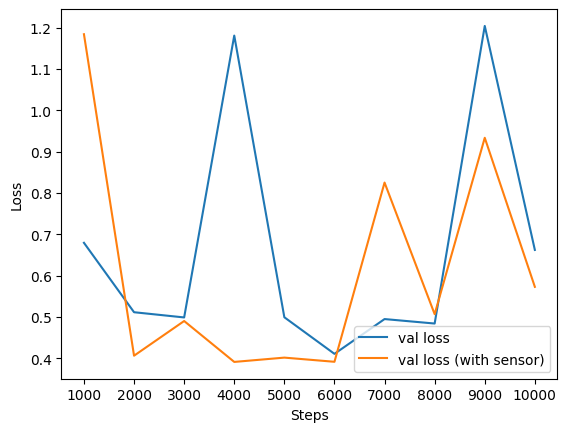

In [43]:
r3d = './r3d/job.sh.o43258608'
r3d2st = './r3d2st/job.sh.o43282628'

def load_abci_job(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    return lines

def parse_abci_job(lines):
    train_loss = []
    val_loss = []
    train_loss_avg = []
    val_loss_avg = []
    prev = 'Epoch'
    for line in lines:
        if line.startswith('Epoch'):
            if prev == 'Validation' and len(train_loss) > 0:
                train_loss_avg.append(sum(train_loss) / len(train_loss))
                train_loss = []
            prev = 'Epoch'
            loss = line.split('Loss=')
            loss = loss[1] if len(loss) > 1 else ''
            loss = float(loss.split(',')[0]) if loss else None
            if loss:
                train_loss.append(loss)
        if line.startswith('Validation'):
            if prev == 'Epoch' and len(val_loss) > 0:
                val_loss_avg.append(sum(val_loss) / len(val_loss))
                val_loss = []
            prev = 'Validation'
            loss = line.split('Val Loss=')
            loss = loss[1] if len(loss) > 1 else ''
            loss = float(loss.split(',')[0]) if loss else None
            if loss:
                val_loss.append(loss)
    return train_loss_avg, val_loss_avg
    

r3d_lines = load_abci_job(r3d)
r3d2st_lines = load_abci_job(r3d2st)

train_loss_avg, val_loss_avg = parse_abci_job(r3d_lines)
train_loss_avg2, val_loss_avg2 = parse_abci_job(r3d2st_lines)

print(val_loss_avg)
print(val_loss_avg2)

import matplotlib.pyplot as plt

plt.plot(val_loss_avg[:10], label='val loss')
plt.plot(val_loss_avg2[:10], label='val loss (with sensor)')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.xticks(range(10), [f"{i*1000}" for i in range(1, 11)])
plt.legend()
plt.show()


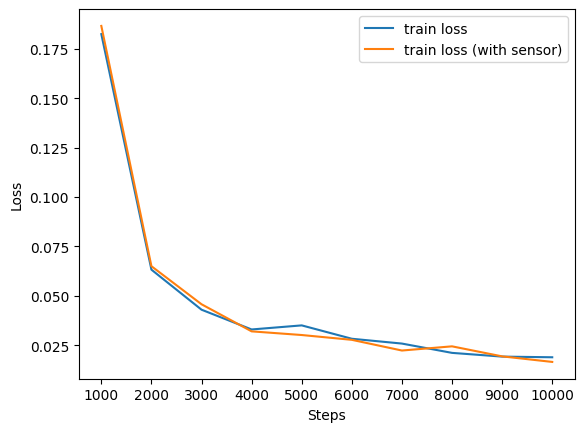

In [41]:
import matplotlib.pyplot as plt

plt.plot(train_loss_avg[:10], label='train loss')
plt.plot(train_loss_avg2[:10], label='train loss (with sensor)')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.xticks(range(10), [f"{i*1000}" for i in range(1, 11)])  # Show steps as 1000, 2000, 3000, ..., 10000
plt.legend()
plt.show()

# モデルサイズ

In [6]:
from r3d.models.model import R3D_Model
import torch

def calculate_memory_requirements(model, input_size, dtype=torch.float32):
    """
    Calculate memory requirements (parameters, activations, gradients) for the model.
    
    Args:
        model (torch.nn.Module): The model to analyze.
        input_size (tuple): Input tensor size as (batch_size, channels, frames, height, width).
        dtype (torch.dtype): Data type of the tensors (default: torch.float32).
        
    Returns:
        total_memory_mb (float): Total memory requirements in MB.
    """
    # 1. Parameters memory
    num_params = sum(p.numel() for p in model.parameters())
    param_memory = num_params * torch.finfo(dtype).bits / 8  # Convert to bytes

    # 2. Input data memory
    batch_size, channels, frames, height, width = input_size
    input_memory = batch_size * channels * frames * height * width * torch.finfo(dtype).bits / 8

    # 3. Activations memory
    activation_memory = 0
    hooks = []

    def hook_fn(module, input, output):
        nonlocal activation_memory
        if isinstance(output, tuple):  # Handle multiple outputs
            activation_memory += sum(o.numel() for o in output)
        else:
            activation_memory += output.numel()

    # Register hooks to capture activation sizes
    for layer in model.modules():
        hooks.append(layer.register_forward_hook(hook_fn))
    
    # Dummy forward pass to compute activation sizes
    dummy_input = torch.zeros(input_size, dtype=dtype)
    model(dummy_input)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Convert activation memory to bytes
    activation_memory *= torch.finfo(dtype).bits / 8

    # 4. Gradient memory
    gradient_memory = param_memory * 2  # Gradients require the same size as parameters

    # Total memory
    total_memory = param_memory + input_memory + activation_memory + gradient_memory
    total_memory_mb = total_memory / (1024 ** 2)  # Convert to MB

    return total_memory_mb

model = R3D_Model(num_classes=12, pretrained=True)
input_size = (4, 3, 104, 112, 112)  # Batch size 8, 3 channels, 16 frames, 112x112 spatial size
memory_mb = calculate_memory_requirements(model, input_size)

print(f"Total memory requirements: {memory_mb:.2f} MB")

Total memory requirements: 10064.04 MB


In [10]:
from r3d2st.models.model import R3D_TwoStream_Model
import torch


def calculate_memory_requirements_two_stream(model, video_input_size, sensor_input_size, dtype=torch.float32):
    """
    Calculate memory requirements (parameters, activations, gradients) for the two-stream model.
    
    Args:
        model (torch.nn.Module): The two-stream model to analyze.
        video_input_size (tuple): Video input tensor size as (batch_size, channels, frames, height, width).
        sensor_input_size (tuple): Sensor input tensor size as (batch_size, channels, frames, height, width).
        dtype (torch.dtype): Data type of the tensors (default: torch.float32).
        
    Returns:
        total_memory_mb (float): Total memory requirements in MB.
    """
    # 1. Parameters memory
    num_params = sum(p.numel() for p in model.parameters())
    param_memory = num_params * torch.finfo(dtype).bits / 8  # Convert to bytes

    # 2. Input data memory
    video_memory = torch.prod(torch.tensor(video_input_size)) * torch.finfo(dtype).bits / 8
    sensor_memory = torch.prod(torch.tensor(sensor_input_size)) * torch.finfo(dtype).bits / 8
    input_memory = video_memory + sensor_memory

    # 3. Activations memory
    activation_memory = 0
    hooks = []

    def hook_fn(module, input, output):
        nonlocal activation_memory
        if isinstance(output, tuple):  # Handle multiple outputs
            activation_memory += sum(o.numel() for o in output)
        else:
            activation_memory += output.numel()

    # Register hooks to capture activation sizes
    for layer in model.modules():
        hooks.append(layer.register_forward_hook(hook_fn))
    
    # Dummy forward pass to compute activation sizes
    video_dummy_input = torch.zeros(video_input_size, dtype=dtype)
    sensor_dummy_input = torch.zeros(sensor_input_size, dtype=dtype)
    model(video_dummy_input, sensor_dummy_input)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Convert activation memory to bytes
    activation_memory *= torch.finfo(dtype).bits / 8

    # 4. Gradient memory
    gradient_memory = param_memory * 2  # Gradients require the same size as parameters

    # Total memory
    total_memory = param_memory + input_memory + activation_memory + gradient_memory
    total_memory_mb = total_memory / (1024 ** 2)  # Convert to MB

    return total_memory_mb


model = R3D_TwoStream_Model(num_classes=12, pretrained=True)
input_size = (4, 3, 104, 112, 112)
sensor_input_size = (4, 1, 104, 30, 40)
memory_mb = calculate_memory_requirements_two_stream(model, input_size, sensor_input_size)

print(f"Total memory requirements: {memory_mb:.2f} MB")

Total memory requirements: 10111.51 MB


In [8]:
from cnn_lstm.models.cnn_lstm import CNN_LSTM

import torch

def calculate_memory_requirements_cnn_lstm(model, input_sizes, dtype=torch.float32):
    """
    Calculate memory requirements (parameters, activations, gradients) for the CNN_LSTM model.

    Args:
        model (torch.nn.Module): The CNN_LSTM model.
        input_sizes (dict): Dictionary containing input tensor sizes:
                            - 'feats': (batch_size, sequence_length, channels, height, width)
                            - 'masks': (batch_size, sequence_length, channels, height, width) [optional]
        dtype (torch.dtype): Data type of the tensors (default: torch.float32).
    
    Returns:
        total_memory_mb (float): Total memory requirements in MB.
    """
    # 1. Parameters memory
    num_params = sum(p.numel() for p in model.parameters())
    param_memory = num_params * torch.finfo(dtype).bits / 8  # Convert to bytes

    # 2. Input data memory
    input_memory = 0
    for key, size in input_sizes.items():
        input_memory += torch.prod(torch.tensor(size)) * torch.finfo(dtype).bits / 8

    # 3. Activations memory
    activation_memory = 0
    hooks = []

    def hook_fn(module, input, output):
        nonlocal activation_memory
        if isinstance(output, tuple):  # Handle multiple outputs
            activation_memory += sum(o.numel() for o in output if isinstance(o, torch.Tensor))
        elif isinstance(output, torch.Tensor):
            activation_memory += output.numel()


    # Register hooks to capture activation sizes
    for layer in model.modules():
        hooks.append(layer.register_forward_hook(hook_fn))
    
    # Dummy forward pass to compute activation sizes
    dummy_inputs = {k: torch.zeros(v, dtype=dtype) for k, v in input_sizes.items()}
    model(dummy_inputs)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Convert activation memory to bytes
    activation_memory *= torch.finfo(dtype).bits / 8

    # 4. Gradient memory
    gradient_memory = param_memory * 2  # Gradients require the same size as parameters

    # Total memory
    total_memory = param_memory + input_memory + activation_memory + gradient_memory
    total_memory_mb = total_memory / (1024 ** 2)  # Convert to MB

    return total_memory_mb

# Example usage
input_sizes = {
    'feats': (4, 100, 256, 30, 40),  # Example: batch_size=8, sequence_length=200, channels=256, height=30, width=40
    'masks': (4, 100, 1, 30, 40)    # Example: batch_size=8, sequence_length=200, channels=1, height=30, width=40
}
model = CNN_LSTM(nclass=12, model='feat-sensor-small', c_stream2_large=True)

memory_mb = calculate_memory_requirements_cnn_lstm(model, input_sizes)
print(f"Total memory requirements for CNN_LSTM model: {memory_mb:.2f} MB")


Total memory requirements for CNN_LSTM model: 998.81 MB


In [9]:
from cnn_lstm.models.cnn_lstm import CNN_LSTM

import torch

input_sizes = {
    'feats': (4, 100, 256, 30, 40),  # Example: batch_size=8, sequence_length=200, channels=256, height=30, width=40
}
model = CNN_LSTM(nclass=12, model='feat')

memory_mb = calculate_memory_requirements_cnn_lstm(model, input_sizes)
print(f"Total memory requirements for CNN_LSTM model: {memory_mb:.2f} MB")

Total memory requirements for CNN_LSTM model: 874.98 MB


In [5]:
from cnn_lstm.modeling.deeplab import DeepLab
import torch

def calculate_memory_requirements_deeplab(model, input_size, dtype=torch.float32):
    """
    Calculate memory requirements (parameters, activations, gradients) for the DeepLab model.

    Args:
        model (torch.nn.Module): The DeepLab model.
        input_size (tuple): Input tensor size as (batch_size, channels, height, width).
        dtype (torch.dtype): Data type of the tensors (default: torch.float32).
    
    Returns:
        total_memory_mb (float): Total memory requirements in MB.
    """
    # 1. Parameters memory
    num_params = sum(p.numel() for p in model.parameters())
    param_memory = num_params * torch.finfo(dtype).bits / 8  # Convert to bytes

    # 2. Input data memory
    input_memory = torch.prod(torch.tensor(input_size)) * torch.finfo(dtype).bits / 8

    # 3. Activations memory
    activation_memory = 0
    hooks = []

    def hook_fn(module, input, output):
        nonlocal activation_memory
        if isinstance(output, tuple):  # Handle multiple outputs
            activation_memory += sum(o.numel() for o in output if isinstance(o, torch.Tensor))
        elif isinstance(output, torch.Tensor):
            activation_memory += output.numel()

    # Register hooks to capture activation sizes
    for layer in model.modules():
        hooks.append(layer.register_forward_hook(hook_fn))
    
    # Dummy forward pass to compute activation sizes
    dummy_input = torch.zeros(input_size, dtype=dtype)
    model(dummy_input)
    
    # Remove hooks
    for hook in hooks:
        hook.remove()
    
    # Convert activation memory to bytes
    activation_memory *= torch.finfo(dtype).bits / 8

    # 4. Gradient memory
    gradient_memory = param_memory * 2  # Gradients require the same size as parameters

    # Total memory
    total_memory = param_memory + input_memory + activation_memory + gradient_memory
    total_memory_mb = total_memory / (1024 ** 2)  # Convert to MB

    return total_memory_mb

# Example usage
if __name__ == "__main__":
    model = DeepLab(backbone='mobilenet', output_stride=16)
    input_size = (4, 3, 480, 640)  # Example: batch_size=1, channels=3, height=513, width=513
    memory_mb = calculate_memory_requirements_deeplab(model, input_size)
    print(f"Total memory requirements for DeepLab model: {memory_mb:.2f} MB")



Total memory requirements for DeepLab model: 2511.74 MB
